# Simulate an (s, S) inventory sysem #
- s is the reorder point: when the inventory level falls below this threshold, the item is restocked.
- S is the restock level: when the item is reordered, it is brought up to this level

Return the following key metrics:
- Average inventory level throughout the day
- Average foot traffic (include customers and employees restocking)
- Proportion of demand met
- Proportion of demand not met
- Amount of leftover stock at the end of the day
- Number of inventory restocks throughout the day


In [67]:
# All necessary imports
import numpy as np
import matplotlib.pyplot as plt

In [68]:
# Define the (s, S) inventory simulation as a function
def simulate_inventory(initial_inventory_frozen, initial_inventory_snack, initial_inventory_bakery,
                       s_frozen, S_frozen, s_snack, S_snack, s_bakery, S_bakery, plot_first_run=False):
    
    # Simulating for a full day (13 hours), in 5 minute intervals
    time_intervals = np.arange(0, 13 * 60, 5)

    # Define the on-peak and off-peak time ranges
    on_peak_start = 4 * 60  # 12:00 PM (in minutes since 8:00 AM)
    on_peak_end = 10 * 60  # 6:00 PM (in minutes since 8:00 AM)

    # Initialize inventory levels
    inventory_frozen = initial_inventory_frozen
    inventory_snack = initial_inventory_snack
    inventory_bakery = initial_inventory_bakery

    # Initialize tracking variables:
    # Total customer demand
    total_demand_frozen = 0
    total_demand_snack = 0
    total_demand_bakery = 0

    # Amount of demand met 
    total_met_frozen = 0
    total_met_snack = 0
    total_met_bakery = 0

    # Amount of demand not met due to inventory shortage
    total_not_met_frozen = 0
    total_not_met_snack = 0
    total_not_met_bakery = 0

    # Counter for number of times restocks occurred
    restock_count_frozen = 0
    restock_count_snack = 0
    restock_count_bakery = 0


    # Inventory levels during the day as items deplete and restock
    inventory_levels_frozen = []
    inventory_levels_snack = []
    inventory_levels_bakery = []

    # Total number of people (includes customer arrivals and employees during restock)
    total_people = []



    # Begin simulation
    for interval in time_intervals:
        # Record inventory levels at the start of the interval
        inventory_levels_frozen.append(inventory_frozen)
        inventory_levels_snack.append(inventory_snack)
        inventory_levels_bakery.append(inventory_bakery)

        # Determine if we're in an on-peak or off-peak time period
        if on_peak_start <= interval < on_peak_end:
            # On-peak period
            num_customers = np.random.poisson(41.52)
            frozen_removal = np.random.beta(0.726, 0.603) * (49.903 - 11.097) + 11.097
            snack_removal = np.random.normal(31.933, 4.297)
            bakery_removal = np.random.uniform(4.0, 7.0)
        else:
            # Off-peak period
            num_customers = np.random.poisson(20.83)
            frozen_removal = np.random.normal(14.733, 1.436)
            snack_removal = np.random.normal(22.667, 11.276)
            bakery_removal = np.random.normal(2.667, 1.989)

        # Track total demand for this interval
        total_demand_frozen += frozen_removal
        total_demand_snack += snack_removal
        total_demand_bakery += bakery_removal

        # Calculate met demand and not met demand
        met_frozen = min(frozen_removal, inventory_frozen)
        total_met_frozen += met_frozen
        total_not_met_frozen += max(0, frozen_removal - inventory_frozen)
        inventory_frozen -= met_frozen

        met_snack = min(snack_removal, inventory_snack)
        total_met_snack += met_snack
        total_not_met_snack += max(0, snack_removal - inventory_snack)
        inventory_snack -= met_snack

        met_bakery = min(bakery_removal, inventory_bakery)
        total_met_bakery += met_bakery
        total_not_met_bakery += max(0, bakery_removal - inventory_bakery)
        inventory_bakery -= met_bakery


        # Initialize number of employees tracker
        num_employees = 0
        
        # Restock if inventory falls below the reorder point (s)
        if inventory_frozen < s_frozen:
            inventory_frozen = S_frozen
            restock_count_frozen += 1  # Increment the frozen restock counter
            num_employees += 4         # Add number of employees needed to restock
        if inventory_snack < s_snack:
            inventory_snack = S_snack
            restock_count_snack += 1  # Increment the snack restock counter
            num_employees += 4        # Add number of employees needed to restock
        if inventory_bakery < s_bakery:
            inventory_bakery = S_bakery
            restock_count_bakery += 1  # Increment the bakery restock counter
            num_employees += 2         # Add number of employees needed to restock

        # Track total people for the day
        total_people.append(num_customers+num_employees)

        
    # Plot the inventory levels if this is the first run
    if plot_first_run:
        plt.figure(figsize=(10, 6))
        plt.plot(time_intervals, inventory_levels_frozen, label='Frozen Inventory', marker='o')
        plt.plot(time_intervals, inventory_levels_snack, label='Snack Inventory', marker='o')
        plt.plot(time_intervals, inventory_levels_bakery, label='Bakery Inventory', marker='o')

        # Labeling and formatting the plot
        plt.xlabel('Hour of the Day (8:00 AM to 9:00 PM)')
        plt.ylabel('Inventory Level')
        plt.title('Simulated Inventory System in a Full Day (8:00 AM to 9:00 PM)')
        plt.grid(True)

        # Adjusting the x-axis ticks to show every 60th minute (hourly ticks)
        hour_ticks = np.arange(0, 790, 60)  # Every 60th index corresponds to a new hour (from 0 to 780 minutes)
        hour_labels = np.arange(8, 22)  # Labels from 8 AM to 9 PM

        # Set the x-ticks and labels
        plt.xticks(hour_ticks, hour_labels)

        # Move the legend outside the plot
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

        # Show the plot
        plt.tight_layout()  # Adjust layout to ensure everything fits
        plt.show()



        
        # Plot foot traffic (customers and emploeyes) over time
        plt.figure(figsize=(10, 6))
        plt.plot(time_intervals, total_people, label='Number of People', marker='o', color='purple')
    
        # Labeling and formatting the plot
        plt.xlabel('Hour of the Day (8:00 AM to 9:00 PM)')
        plt.ylabel('Number of People')
        plt.title('Foot Traffic in Store Over Time')
        plt.grid(True)
    
        # Adjusting the x-axis ticks to show every 60th minute (hourly ticks)
        hour_ticks = np.arange(0, 790, 60)  # Every 60th index corresponds to a new hour (from 0 to 780 minutes)
        hour_labels = np.arange(8, 22)  # Labels from 8 AM to 9 PM
    
        # Set the x-ticks and labels
        plt.xticks(hour_ticks, hour_labels)
        
        # Show the plot
        plt.tight_layout()  # Adjust layout to ensure everything fits
        plt.show()

    
    # Calculate average inventory levels over the full day
    avg_people = sum(total_people) / len(total_people)
    avg_inventory_frozen = sum(inventory_levels_frozen) / len(inventory_levels_frozen)
    avg_inventory_snack = sum(inventory_levels_snack) / len(inventory_levels_snack)
    avg_inventory_bakery = sum(inventory_levels_bakery) / len(inventory_levels_bakery)


    # Return key metrics for this simulation run
    return {
        "avg_people": avg_people,
        "avg_inventory_frozen": avg_inventory_frozen,
        "avg_inventory_snack": avg_inventory_snack,
        "avg_inventory_bakery": avg_inventory_bakery,
        "percent_demand_met_frozen": total_met_frozen / total_demand_frozen,
        "percent_demand_met_snack": total_met_snack / total_demand_snack,
        "percent_demand_met_bakery": total_met_bakery / total_demand_bakery,
        "percent_demand_not_met_frozen": total_not_met_frozen / total_demand_frozen,
        "percent_demand_not_met_snack": total_not_met_snack / total_demand_snack,
        "percent_demand_not_met_bakery": total_not_met_bakery / total_demand_bakery,
        "leftover_frozen": inventory_frozen,
        "leftover_snack": inventory_snack,
        "leftover_bakery": inventory_bakery,
        "restock_count_frozen": restock_count_frozen,
        "restock_count_snack": restock_count_snack,
        "restock_count_bakery": restock_count_bakery
    }

To generate the most accurate estimators that account for variability, perform multiple independent simulation runs of a particular (s, S) inventory model, and calculate averages across the multiple runs. 

In [70]:
# Define function that performs multiple runs of a (s, S) simulation and averages across them 
def run_multiple_simulations(n_runs, initial_inventory_frozen, initial_inventory_snack, initial_inventory_bakery,
                             s_frozen, S_frozen, s_snack, S_snack, s_bakery, S_bakery):
    
    # Initialize lists to track the key metrics from multiple runs
    metrics = {
        "avg_people": [],
        "avg_inventory_frozen": [],
        "avg_inventory_snack": [],
        "avg_inventory_bakery": [],
        "percent_demand_met_frozen": [],
        "percent_demand_met_snack": [],
        "percent_demand_met_bakery": [],
        "percent_demand_not_met_frozen": [],
        "percent_demand_not_met_snack": [],
        "percent_demand_not_met_bakery": [],
        "leftover_frozen": [],
        "leftover_snack": [],
        "leftover_bakery": [],
        "restock_count_frozen": [],
        "restock_count_snack": [],
        "restock_count_bakery": []
    }

    # Perform multiple runs
    for i in range(n_runs):
        result = simulate_inventory(initial_inventory_frozen, initial_inventory_snack, initial_inventory_bakery,
                                    s_frozen, S_frozen, s_snack, S_snack, s_bakery, S_bakery, plot_first_run=(i == 0))
        # Track the key metrics from each run
        for key in metrics.keys():
            metrics[key].append(result[key])

    # Calculate key metrics (averaged over multiple simulation runs)
    avg_metrics = {key: np.mean(values) for key, values in metrics.items()}



    # Print results
    print(f'Simulation Results after {n_runs} Runs')
    print("=" * 50)
    
    # First, display the average number of people first
    print(f"Average Number of People: {avg_metrics['avg_people']:.2f}\n")
    
    # Second, organize metrics by category
    categories = ['Frozen', 'Snack', 'Bakery']
    for category in categories:
        print(f"{category} Metrics:")
        for key, value in avg_metrics.items():
            # Check if the key belongs to the current category
            if category.lower() in key:
                # Format the key: replace underscores with spaces, remove category name
                formatted_key = key.replace("_", " ").title().replace(category, "").strip()
                
                # Format value: add % symbol for percentages, round decimals to 2 places
                if "Percent" in formatted_key:
                    formatted_value = f"{value * 100:.2f}%"  # Convert to percentage
                else:
                    formatted_value = f"{value:.2f}"  # Round to 2 decimal places
                
                print(f"  {formatted_key}: {formatted_value}")
        print()  # Add space between categories

    
    # Return the estimators
    return avg_metrics


Now we can initialize the parameters for the initial inventory levels and define the variables (s, S).
Run the simulation and construct estimators for our key metrics. 
We can adjust the parameters to compare metrics and decide which inventory models are optimal. 

# Baseline inventory model #
If inventory falls to 50%, restock to 100%

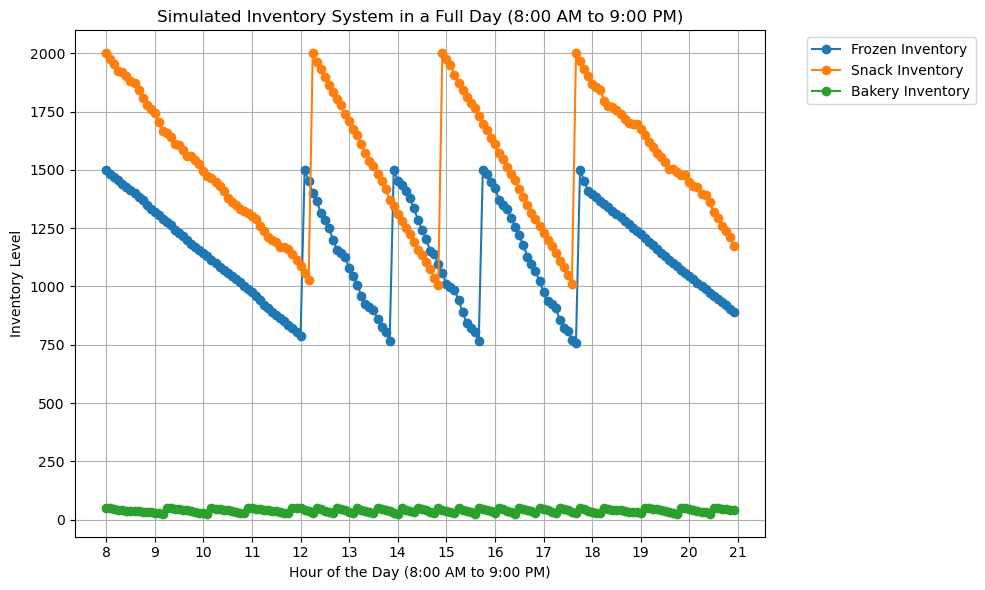

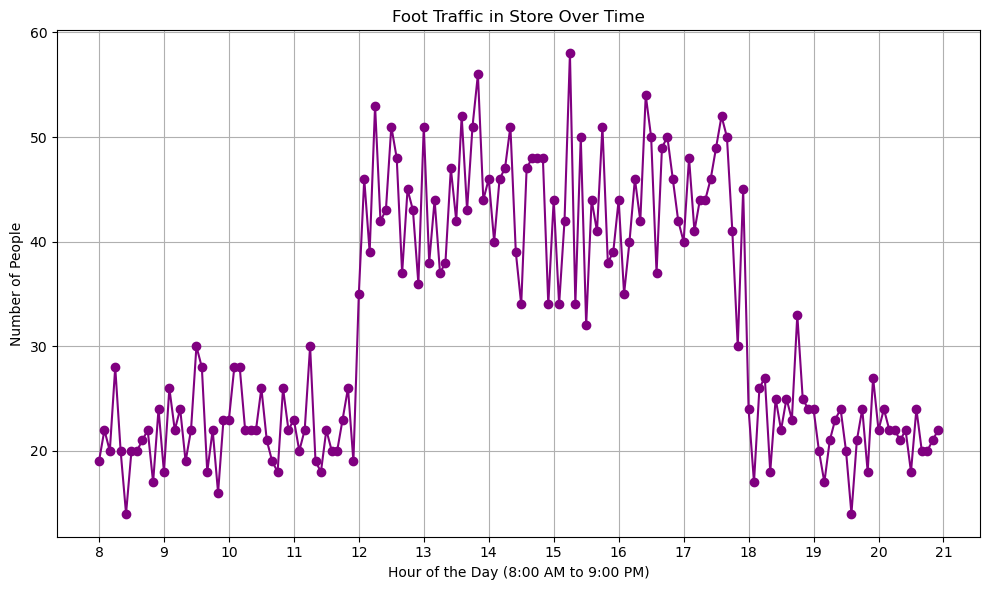

Simulation Results after 50 Runs
Average Number of People: 30.89

Frozen Metrics:
  Avg Inventory: 1154.10
  Percent Demand Met: 100.00%
  Percent Demand Not Met: 0.00%
  Leftover: 1001.77
  Restock Count: 4.00

Snack Metrics:
  Avg Inventory: 1516.49
  Percent Demand Met: 100.00%
  Percent Demand Not Met: 0.00%
  Leftover: 1747.61
  Restock Count: 3.88

Bakery Metrics:
  Avg Inventory: 38.79
  Percent Demand Met: 100.00%
  Percent Demand Not Met: 0.00%
  Leftover: 38.36
  Restock Count: 22.08



In [72]:
# Baseline inventory model: If inventory falls to 50%, restock to 100%

# Parameters for the simulation
initial_inventory_frozen = 1500
initial_inventory_snack = 2000
initial_inventory_bakery = 50
s_frozen, S_frozen = 750, 1500
s_snack, S_snack = 1000, 2000
s_bakery, S_bakery = 25, 50

# Run multiple simulations 
n_runs = 50
avg_metrics = run_multiple_simulations(n_runs, initial_inventory_frozen, initial_inventory_snack, initial_inventory_bakery,
                                       s_frozen, S_frozen, s_snack, S_snack, s_bakery, S_bakery)


# Recommended Changes #
- Bakery is restocked too many times per day, which doesn't seem efficient. Allocating more shelf space for bakery items would require less restocking throughout the day.
- Although it seems good that frozen and snack items are only restoked 4 and 3 times, respectively. We also need to consider that having 50% empty shelves looks bad. We can consider increasing the reorder point for frozen and snacks, which would maintain a higher level of inventory on shelf thoughout the day, but without increasing the number of times needed to restock by too much. 

New rules: 
- Frozen: If inventory falls to 75%, restock to 100%
- Snacks: If inventory falls to 75%, restock to 100%
- Bakery: If inventory falls to 50%, restock to 100%

# Improved Inventory Model #

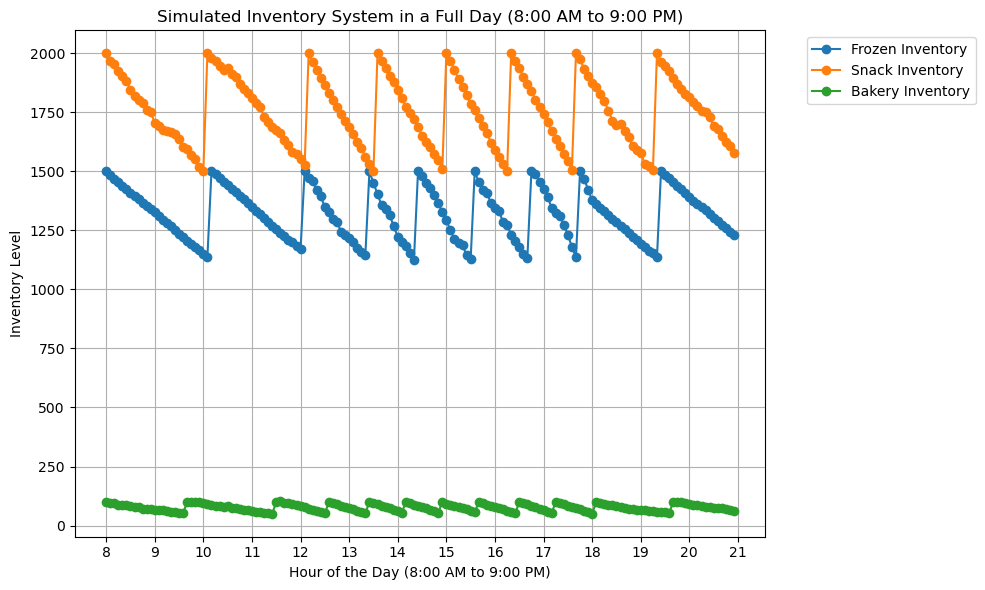

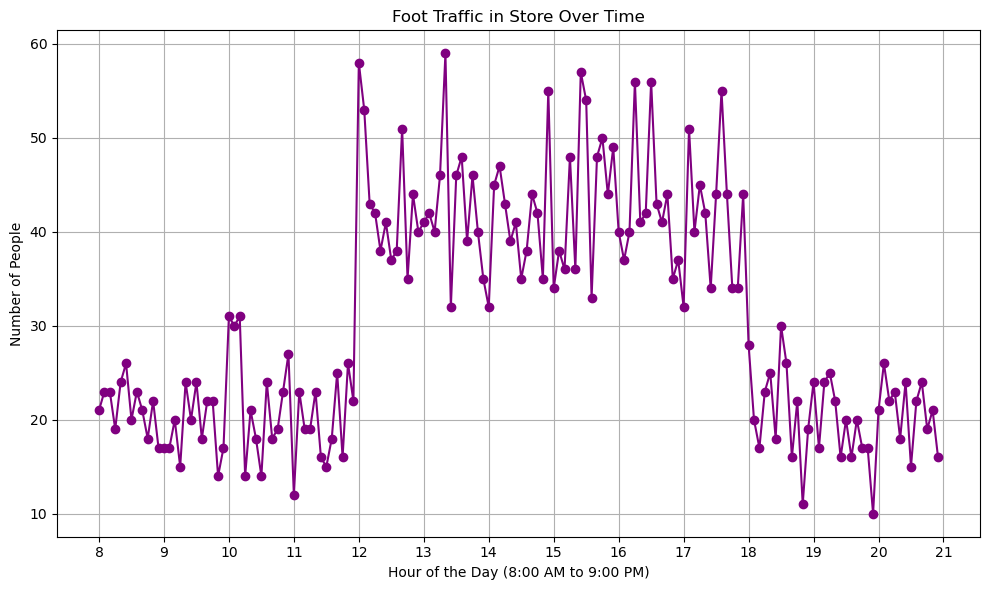

Simulation Results after 50 Runs
Average Number of People: 31.00

Frozen Metrics:
  Avg Inventory: 1321.97
  Percent Demand Met: 100.00%
  Percent Demand Not Met: 0.00%
  Leftover: 1342.30
  Restock Count: 8.76

Snack Metrics:
  Avg Inventory: 1761.67
  Percent Demand Met: 100.00%
  Percent Demand Not Met: 0.00%
  Leftover: 1815.34
  Restock Count: 7.80

Bakery Metrics:
  Avg Inventory: 76.70
  Percent Demand Met: 100.00%
  Percent Demand Not Met: 0.00%
  Leftover: 72.54
  Restock Count: 11.24



In [75]:
# Improved inventory model

# Parameters for the simulation
initial_inventory_frozen = 1500
initial_inventory_snack = 2000
initial_inventory_bakery = 100
s_frozen, S_frozen = 1125, 1500
s_snack, S_snack = 1500, 2000
s_bakery, S_bakery = 50, 100

# Run multiple simulations
n_runs = 50
avg_metrics = run_multiple_simulations(n_runs, initial_inventory_frozen, initial_inventory_snack, initial_inventory_bakery,
                                       s_frozen, S_frozen, s_snack, S_snack, s_bakery, S_bakery)
